# Hackfest notebook exploring the LCBO

A notebook to play with... jupyter notebooks! This is an experiment with some data from the Liquor Control Board of Ontario's API (https://lcboapi.com/) and using pandas to do some exploring of the data. 

Credit goes to Marta Alonso and PyLadies DC for some helpful Anaconda and notebook installation tips and an introduction to pandas: https://github.com/PyLadiesDC/python-for-journalists

Requirements: jupyter, pandas, matplotlib

In [5]:
from secrets import ACCESS_KEY
import requests
import csv
import pandas as pd

First started by connecting to the API to search products, but found that the options for searching were rather limited. It would have been great to be able to specify a primary category or secondary category. Instead, went to the datasets option to download the data. 

In [6]:
url = 'https://lcboapi.com/datasets?'
query = {'access_key':ACCESS_KEY, 'order':'total_products'}

In [7]:
r = requests.get(url, params=query)

Downloaded the first .zip file mentioned in the results above and then used the products.csv file.

Switching over to pandas

In [8]:
mydata = pd.read_csv("products1.csv")
mydata.shape

(26691, 46)

In [9]:
mydata.columns

Index([u'id', u'is_dead', u'name', u'tags', u'is_discontinued',
       u'price_in_cents', u'regular_price_in_cents',
       u'limited_time_offer_savings_in_cents', u'limited_time_offer_ends_on',
       u'bonus_reward_miles', u'bonus_reward_miles_ends_on', u'stock_type',
       u'primary_category', u'secondary_category', u'origin', u'package',
       u'package_unit_type', u'package_unit_volume_in_milliliters',
       u'total_package_units', u'volume_in_milliliters', u'alcohol_content',
       u'price_per_liter_of_alcohol_in_cents', u'price_per_liter_in_cents',
       u'inventory_count', u'inventory_volume_in_milliliters',
       u'inventory_price_in_cents', u'sugar_content', u'producer_name',
       u'released_on', u'has_value_added_promotion', u'has_limited_time_offer',
       u'has_bonus_reward_miles', u'is_seasonal', u'is_vqa', u'is_kosher',
       u'value_added_promotion_description', u'description',
       u'serving_suggestion', u'tasting_note', u'updated_at',
       u'image_thumb_

What are the first 5 rows in the data?

In [10]:
mydata.head(5)

,id,is_dead,name,tags,is_discontinued,price_in_cents,regular_price_in_cents,limited_time_offer_savings_in_cents,limited_time_offer_ends_on,bonus_reward_miles,...,description,serving_suggestion,tasting_note,updated_at,image_thumb_url,image_url,varietal,style,tertiary_category,sugar_in_grams_per_liter
0,408013,f,14 Kerner Nouveau - the Hanging Man,14 kerner nouveau - the hanging man wine cana...,f,1195,1195,0,NaN,0,...,NaN,NaN,NaN,16:25.5,NaN,NaN,NaN,NaN,NaN,NaN
1,328534,f,Jackson-Triggs Cabernet Sauvignon,jackson triggs jackson-triggs jacksontriggs ca...,f,994,994,0,NaN,0,...,NaN,"Pork or light red meat dishes, pastas",Light to medium ruby garnet colour; dry and me...,56:20.9,https://dx5vpyka4lqst.cloudfront.net/products/...,https://dx5vpyka4lqst.cloudfront.net/products/...,Cabernet Sauvignon,Medium-bodied & Fruity,NaN,11.0
2,343087,f,Jos̩ Maria Da Fonseca Domini Plus 2008,jos̩ maria da fonseca domini plus 2008 wine re...,f,3900,3900,0,NaN,0,...,NaN,NaN,The 2008 Domini plus is a blend of Touriga Fra...,33:14.5,NaN,NaN,Touriga Franca Blend,Full-bodied & Firm,NaN,7.0
3,975847,f,Bonny Doon Le Cigare Volant 2008,bonny doon le cigare volant 2008 wine red usa ...,f,3975,3975,0,NaN,0,...,NaN,NaN,"Bright ruby. Pungent cherry, blackcurrant and ...",19:29.0,NaN,NaN,Grenache Blend,Full-bodied & Smooth,NaN,4.0
4,296582,f,Thorn-Clarke Shotfire Cabernet Sauvignon / Shi...,thorn clarke thorn-clarke thornclarke shotfire...,f,2195,2195,0,NaN,0,...,NaN,NaN,This full-bodied red wine wonder is a blend of...,55:19.0,https://dx5vpyka4lqst.cloudfront.net/products/...,https://dx5vpyka4lqst.cloudfront.net/products/...,Cabernet Sauvignon/Syrah,Full-bodied & Smooth,NaN,5.0


Let's sort by the price in cents. What's the most expensive item in Ontario?

In [11]:
mydata.sort_values(by='price_in_cents', ascending=False)

,id,is_dead,name,tags,is_discontinued,price_in_cents,regular_price_in_cents,limited_time_offer_savings_in_cents,limited_time_offer_ends_on,bonus_reward_miles,...,description,serving_suggestion,tasting_note,updated_at,image_thumb_url,image_url,varietal,style,tertiary_category,sugar_in_grams_per_liter
25618,112730,t,Remy Martin Louis XIII Black Pearl,remy martin louis xiii black pearl spirits cog...,f,3500000,3500000,0,NaN,0,...,NaN,NaN,NaN,09:48.1,NaN,NaN,NaN,NaN,NaN,0.0
15397,209973,t,50Yo Glenfiddich,50yo glenfiddich spirits whiskywhiskey scotlan...,f,2600000,2600000,0,NaN,0,...,NaN,NaN,NaN,53:29.6,NaN,NaN,NaN,NaN,Single Malt Scotch,NaN
13968,258111,t,Bowmore 40 Years Old Islay Single Malt,bowmore 40 years old islay single malt spirits...,f,1489500,1489500,0,NaN,0,...,NaN,NaN,"Definitely showing its age, but not in a bad w...",08:27.0,NaN,NaN,NaN,NaN,Single Malt Scotch,NaN
7639,361998,f,Courvoisier L'Esprit Cognac,courvoisier l'esprit lesprit cognac spirits ar...,f,1000000,1000000,0,NaN,0,...,NaN,NaN,NaN,25:16.0,NaN,NaN,Cognac,NaN,XO,NaN
22970,333815,t,Ch̢teau Latour 2001,ch̢teau latour 2001 wine red bordeaux france v...,f,999900,999900,0,NaN,0,...,NaN,NaN,"Deep garnet colored, the nose is open and expr...",19:19.4,NaN,NaN,Bordeaux,NaN,NaN,NaN
13279,364489,f,Auchentoshan 1966,auchentoshan 1966 spirits whiskywhiskey united...,t,829795,829795,0,NaN,0,...,NaN,NaN,NaN,17:50.4,NaN,NaN,Malt Whisky,Bold & Spicy,Scotch Single Malts,NaN
1126,308973,f,Dom P̩rignon Oenoth̬que Brut Ros̩ Champagne 1982,dom p̩rignon oenoth̬que brut ros̩ champagne 19...,f,676395,676395,0,NaN,0,...,The Oenoth̬que label indicates that a Dom P̩ri...,NaN,NaN,26:17.8,NaN,NaN,Champagne,NaN,Ros̩ / Red,NaN
9367,315366,f,Ch̢teau P̩trus 1998,ch̢teau p̩trus 1998 wine red france bordeaux j...,f,627900,627900,0,NaN,0,...,NaN,NaN,NaN,24:07.5,NaN,NaN,Bordeaux Red,NaN,NaN,NaN
25873,279687,t,Balvenie 40 Years Old Speyside Single Malt,balvenie 40 years old speyside single malt spi...,f,623900,623900,0,NaN,0,...,NaN,NaN,"Nose charged with toffee, vanilla, ginger, clo...",50:51.8,NaN,NaN,NaN,NaN,Single Malt Scotch,NaN
2078,438929,t,Hennessy Richard,hennessy richard spirits cognac armagnac franc...,f,591595,591595,0,NaN,0,...,NaN,NaN,NaN,14:59.5,NaN,NaN,NaN,NaN,Unique Selections,NaN


Apparently you can get a bottle of Remy Martin Louis XIII Black Pearl for $35,000. 

So what are the categories of products and how many products are there in each? |

In [12]:
primary_categories = mydata.groupby('primary_category').count()
primary_categories.head(5)

,id,is_dead,name,tags,is_discontinued,price_in_cents,regular_price_in_cents,limited_time_offer_savings_in_cents,limited_time_offer_ends_on,bonus_reward_miles,...,description,serving_suggestion,tasting_note,updated_at,image_thumb_url,image_url,varietal,style,tertiary_category,sugar_in_grams_per_liter
primary_category,,,,,,,,,,,,,,,,,,,,,
Accessories and Non-Alcohol Items,170,170,170,170,170,170,170,170,0,170,...,0,0,0,170,21,21,0,0,0,0
Beer,2082,2082,2082,2082,2082,2082,2082,2082,30,2082,...,4,1018,1107,2082,861,861,1033,1067,1311,499
CLEARANCE SALE,6,6,6,6,6,6,6,6,0,6,...,0,0,0,6,0,0,0,0,0,6
Ciders,74,74,74,74,74,74,74,74,3,74,...,4,55,59,74,47,47,0,44,39,65
Coolers and Cocktails,2,2,2,2,2,2,2,2,0,2,...,0,2,2,2,0,0,0,0,2,0


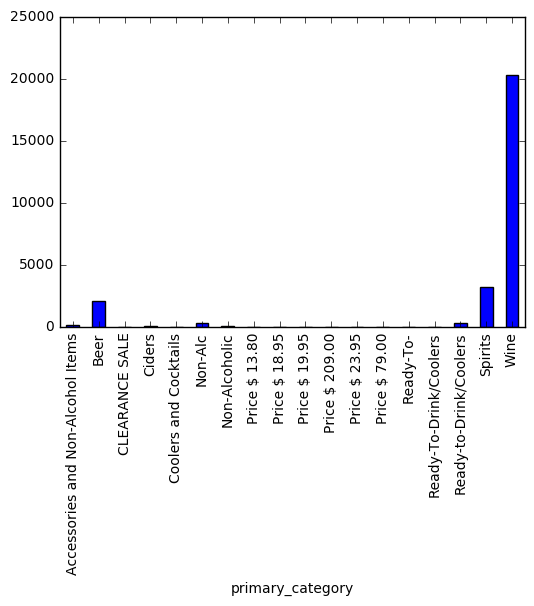

In [13]:
%matplotlib inline
primary_categories['id'].plot(kind="bar")

In [14]:
secondary_categories = mydata.groupby('secondary_category').count().sort_values(by='id', ascending=False).copy()
secondary_categories.head(5)

,id,is_dead,name,tags,is_discontinued,price_in_cents,regular_price_in_cents,limited_time_offer_savings_in_cents,limited_time_offer_ends_on,bonus_reward_miles,...,description,serving_suggestion,tasting_note,updated_at,image_thumb_url,image_url,varietal,style,tertiary_category,sugar_in_grams_per_liter
secondary_category,,,,,,,,,,,,,,,,,,,,,
Red Wine,12447,12447,12447,12447,12447,12447,12447,12447,76,12447,...,1773,1210,7868,12447,2524,2524,8605,4698,0,9728
White Wine,5352,5352,5352,5352,5352,5352,5352,5352,43,5352,...,722,899,3286,5352,1402,1402,3803,2324,0,4420
Whisky/Whiskey,1073,1073,1073,1073,1073,1073,1073,1073,27,1073,...,26,396,523,1073,434,434,521,435,769,208
Lager,904,904,904,904,904,904,904,904,19,904,...,0,564,598,904,304,304,581,587,681,174
Ale,883,883,883,883,883,883,883,883,10,883,...,0,407,446,883,441,441,405,457,545,222


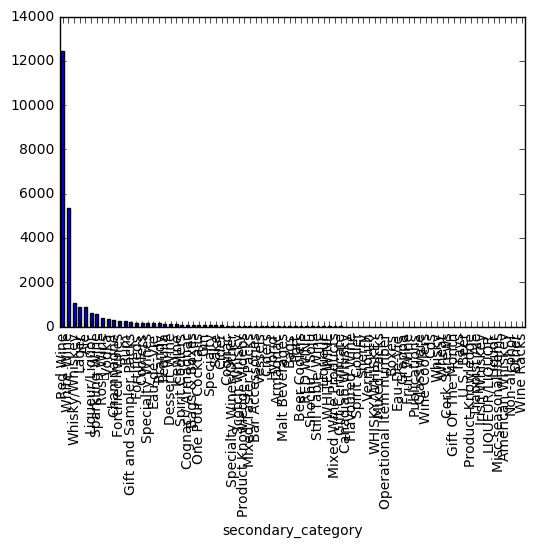

In [15]:
secondary_categories['id'].plot(kind="bar")

Wow, there's some bad data in there. Now switching over to the data that Jen cleaned up with OpenRefine.

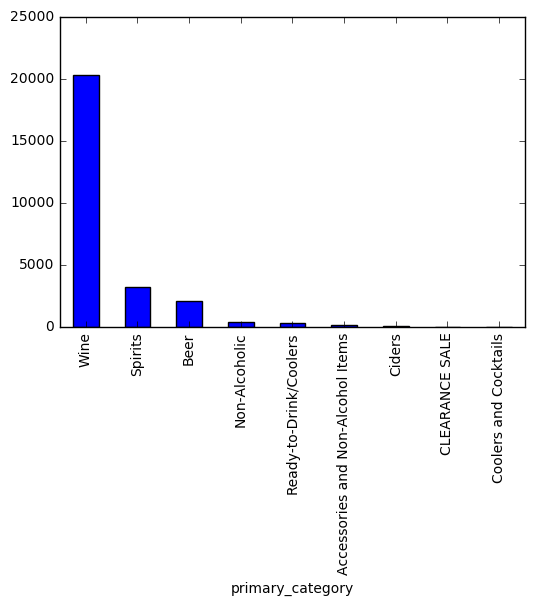

In [16]:
mynewdata = pd.read_csv("products-post-clean-redux.csv")
primary_categories_new = mynewdata.groupby('primary_category').count().sort_values(by='id', ascending=False).copy()
primary_categories_new['id'].plot(kind="bar")

In [17]:
tasting_df = mynewdata[['id','primary_category','tasting_note']].copy()
tasting_df.shape

(26691, 3)

In [18]:
tasting_df.head(5)

,id,primary_category,tasting_note
0,408013,Wine,NaN
1,328534,Wine,Light to medium ruby garnet colour; dry and me...
2,343087,Wine,The 2008 Domini plus is a blend of Touriga Fra...
3,975847,Wine,"Bright ruby. Pungent cherry, blackcurrant and ..."
4,296582,Wine,This full-bodied red wine wonder is a blend of...


In [19]:
tasting_df[(tasting_df['primary_category'] == 'Wine')]

,id,primary_category,tasting_note
0,408013,Wine,NaN
1,328534,Wine,Light to medium ruby garnet colour; dry and me...
2,343087,Wine,The 2008 Domini plus is a blend of Touriga Fra...
3,975847,Wine,"Bright ruby. Pungent cherry, blackcurrant and ..."
4,296582,Wine,This full-bodied red wine wonder is a blend of...
5,212233,Wine,"Clear deep ruby red; red berry, cassis and spi..."
6,212894,Wine,"Silky in texture, this exudes cherry and raspb..."
7,377655,Wine,NaN
8,339986,Wine,"... Even better is the slightly richer, more h..."
9,364893,Wine,Here the nose was completely reduced though th...


In [20]:
tasting_df[(tasting_df['primary_category'] == 'Beer')]

,id,primary_category,tasting_note
19,305557,Beer,"Bright gold colour; aromas of lemon pith, hone..."
22,31146,Beer,"Charcoal-brown colour; aromas of burnt malt, c..."
41,904060,Beer,NaN
47,615591,Beer,Pale yellow with a light foamy head; aromas of...
51,360438,Beer,"Bright medium yellow; aromas of green apple, c..."
70,334797,Beer,Pale amber colour; aromas of baked ginger with...
84,365700,Beer,"Medium gold colour; aromas of orange zest, ros..."
105,12047,Beer,Copper colour; light fruit aroma; muted malt f...
106,233510,Beer,NaN
118,40949,Beer,Golden colour with a fine head; the nose shows...


Let's look at the words in the tasting_note column used for Beer vs. Wine. First getting the all of the words out of the tasting_note column and remove some of the punctuation.

In [118]:
def tasting_notes(category):
    words = tasting_df[(tasting_df['primary_category'] == category)]['tasting_note']
    words = words.str.lower().str.replace("[;:.,%\-()(\d)\']","").str.cat(sep=" ")
    return words

beer_words = tasting_notes('Beer')
wine_words = tasting_notes('Wine')
spirit_words = tasting_notes('Spirits')

To remove stopwords and do some analysis of the text, using the ntlk library. 

In [119]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import wordpunct_tokenize

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(notes):
    text = nltk.wordpunct_tokenize(notes)
    text = [word for word in text if word not in stopwords]
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lwrubel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now, the fun part, working with each category to identify the most common words used in tasting notes. 

In [ ]:
def common_words(text):
    fdist = FreqDist(text)
    return fdist.most_common(20)   

beer = remove_stopwords(beer_words)
common_words(beer)

In [ ]:
wine = remove_stopwords(wine_words)
common_words(wine)


In [129]:
spirits = remove_stopwords(spirit_words)
common_words(spirits)


/anaconda/envs/hackfest/lib/python2.7/site-packages/ipykernel/__main__.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


[('aromas', 902),
 ('finish', 857),
 ('sweet', 814),
 ('colour', 786),
 ('vanilla', 672),
 ('flavours', 665),
 ('amber', 474),
 ('smooth', 438),
 ('clear', 430),
 ('palate', 428),
 ('spice', 420),
 ('caramel', 401),
 ('flavour', 399),
 ('notes', 352),
 ('light', 350),
 ('medium', 333),
 ('nose', 327),
 ('citrus', 295),
 ('long', 294),
 ('fruit', 264)]